## **Clustering Algorithms**

In [1]:
#importing libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.style as style
import tensorflow.compat.v1 as tf
from sklearn import preprocessing
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from tensorflow.python.framework import ops
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.random_projection import GaussianRandomProjection

In [0]:
#pandas column display option
pd.set_option('display.max_columns', 500)

In [3]:
#loading the energy consumption dataset from google drive
drive.mount('/content/drive')
root_path = 'drive/My Drive/Colab Notebooks/bank-full.csv'
df = pd.read_csv(root_path,sep=';')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# #Loading Dataset
# df=pd.read_csv("bank-full.csv",sep=';')

In [0]:
#Creating Dummy Variables
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['default']=df['default'].map({'yes': 1, 'no': 0})
df['housing']=df['housing'].map({'yes': 1, 'no': 0})
df['loan']=df['loan'].map({'yes': 1, 'no': 0})
df_marital = pd.get_dummies(df['marital'])
df['married'] = df_marital['married']
df['divorced'] = df_marital['divorced']
df_education = pd.get_dummies(df['education'])
df['tertiary'] = df_education['tertiary']
df['secondary'] = df_education['secondary']

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,divorced,tertiary,secondary
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,1,0,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,1,0,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,1,0,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,0,0,0,0


In [0]:
#Splitting x and y
y=df['y']
X=df[['age','balance','duration','campaign','previous']]

#scaling the x variables
cols = X.columns
# X = StandardScaler().fit_transform(X)
# X = pd.DataFrame(data=X,columns=cols)

mm_scaler = preprocessing.MinMaxScaler()
X = mm_scaler.fit_transform(X)
X = pd.DataFrame(data=X,columns=cols)

#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=100)

In [24]:
#Finding missing values in the dataset
pd.DataFrame(X_train.isnull().sum()).T

,age,balance,duration,campaign,previous
0,0,0,0,0,0


In [33]:
X_train.head()

,age,balance,duration,campaign,previous
18391,0.285714,0.116863,0.047580,0.016129,0.000000
13056,0.103896,0.069372,0.033550,0.000000,0.000000
13415,0.441558,0.104035,0.039447,0.000000,0.000000
21022,0.272727,0.078868,0.060390,0.016129,0.000000
24510,0.415584,0.080339,0.014437,0.000000,0.007273


## **K-Means Clustering**

In [0]:
class ML_algorithm_utils:

  def elbow_plot(self,kmax,X_train):
    '''
    elbow plot to find the optimum number of clusters
    '''
    wcss = []
    no_of_clusters = range(1, kmax)
    for i in no_of_clusters:
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X_train)
        wcss.append(kmeans.inertia_)

    df_wcss = pd.DataFrame({'Number of Clusters':no_of_clusters,
                  'WCSS':wcss})

    plt.figure(figsize=(7,5))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    
    ax = sns.lineplot(x="Number of Clusters", y="WCSS",marker='o', data=df_wcss)
    ax.set_title('Elbow plot - To determine Optimum No. of clusters')
    plt.savefig("elbow_plot.png",dpi=150)

  def silhouette_plot(self,kmax,X_train):
    '''
    sillhouette plot to find the optimum number of clusters
    '''
    sil = []
    clust = range(2, kmax+1)

    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in clust:
      kmeans = KMeans(n_clusters = k).fit(X_train)
      labels = kmeans.labels_
      sil.append(silhouette_score(X_train, labels, metric = 'euclidean'))

    df_sil = pd.DataFrame({'Number of Clusters':clust,
              'Silhouette Score':sil})
    
    plt.figure(figsize=(7,5))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    ax = sns.lineplot(x="Number of Clusters", y="Silhouette Score",marker='o', data=df_sil)
    ax.set_title('Silhouette plot - To determine Optimum No. of clusters')
    plt.savefig("silhouette_plot.png",dpi=150)

  def Feature_Selection(self,X,y,n_estimators,n):
    '''
    feature selection using random forest classifier
    '''
    #Test Train Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=100)

    #feature selection using random forest classifier
    sel =  RandomForestClassifier(n_estimators=n_estimators, random_state=0, n_jobs=-1)
    sel.fit(X_train, y_train)

    #creating a Dataframe of features and its importance score
    fea_sel = pd.DataFrame({'column_name' : list(X.columns),'score':list(sel.feature_importances_)})

    #sorting the dataframe based on scores
    fea_sel = fea_sel.sort_values(by='score', ascending=False).reset_index(drop=True)
    
    #classifying important and not important features 
    important_feature =list(fea_sel.column_name.iloc[0:n])
    not_so_important_feature = list(fea_sel.column_name.iloc[n:])
    
    return important_feature,not_so_important_feature

  def PCA_no_of_components(self,X_not_so_important_feature):
    '''
    finding no of PCA components for the data
    '''

    #running PCA algorithm on the not so important features
    no_of_components = len(X_not_so_important_feature.columns)

    #running PCA algorithm
    pca = PCA(n_components=no_of_components,svd_solver='full') 
    principalComponents = pca.fit_transform(X_not_so_important_feature)
    principalDf = pd.DataFrame(data = principalComponents)

    #PCA variance plot
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Variance (%)') #for each component
    plt.title('PCA - Explained Variance')
    plt.show()


    #finding the optimal number PCA components that explains 95% of the variance
    optimal_no_of_components = len(pca.explained_variance_ratio_[np.cumsum(pca.explained_variance_ratio_)<0.95])+1

    return optimal_no_of_components

In [0]:
#instantiating cluster helper class
utils = ML_algorithm_utils()

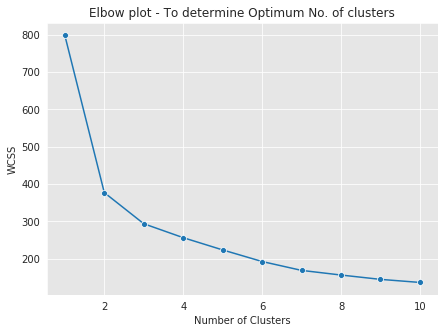

In [35]:

#cluster elbow plot to find the optimal number of clusters for K-Means
utils.elbow_plot(11,X_train)

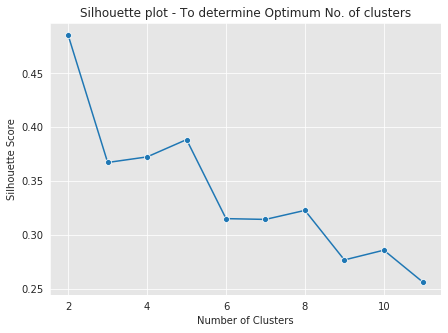

In [36]:
#cluster silhouette plot to find the optimal number of clusters
utils.silhouette_plot(11,X_train)

In [37]:
#K-Means clustering 
kmeans = KMeans(n_clusters=2,max_iter=1200, algorithm = 'auto') # You want cluster the energy records into 2: consumed or Not consumed
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
#Cluster Center
centroids = kmeans.cluster_centers_
centroids

array([[0.20918864, 0.08367299, 0.05299896, 0.02844654, 0.0022356 ],
       [0.44782986, 0.08796755, 0.05163411, 0.0292433 , 0.00191037]])

In [39]:
#predicting the cluster with the help K-means clustering
print('Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels\n')
y_pred_train = kmeans.predict(X_train)
print('Training Accuracy :' , accuracy_score(y_train,y_pred_train)*100)

y_pred_test = kmeans.predict(X_test)
print('Testing Accuracy :', accuracy_score(y_test,y_pred_test)*100)

train_acc_km = []
test_acc_km = []
train_acc_km.append(accuracy_score(y_train,y_pred_train))
test_acc_km.append(accuracy_score(y_test,y_pred_test))

Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels

Training Accuracy : 60.05940531487977
Testing Accuracy : 59.7758773223238


In [40]:
df1 = pd.DataFrame(
    {'Algorithm': 'K-Means',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_km
    })
df2 = pd.DataFrame(
    {'Algorithm': 'K-Means',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_km
    })

df_km = pd.concat([df1, df2],sort=False)
df_km['Accuracy'] = (df_km['Accuracy'] * 100).round(2)
df_km

,Algorithm,Acc,Accuracy
0,K-Means,TrainingAccuracy,60.06
0,K-Means,TestingAccuracy,59.78


## **Expectation Maximization** 

In [41]:
# fitting a expectation maximization model
em = GaussianMixture(n_components=2, init_params='random')
Gaussian = em.fit(X_train)
y_pred_train_em= (Gaussian.predict(X_train)>.5).astype('int')
y_pred_test_em= (Gaussian.predict(X_test)>.5).astype('int')

print('Test and Train Accuracies of EM algorithm to a Gaussian Mixture Model')
print('Training Accuracy :' , accuracy_score(y_train,y_pred_train_em)*100)
print('Testing Accuracy :' , accuracy_score(y_test,y_pred_test_em)*100)


train_acc_em = []
test_acc_em = []
train_acc_em.append(accuracy_score(y_train,y_pred_train_em))
test_acc_em.append(accuracy_score(y_test,y_pred_test_em))

Test and Train Accuracies of EM algorithm to a Gaussian Mixture Model
Training Accuracy : 76.58861819445761
Testing Accuracy : 76.51135358301386


In [42]:
df1 = pd.DataFrame(
    {'Algorithm': 'EM',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_em
    })
df2 = pd.DataFrame(
    {'Algorithm': 'EM',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_em
    })

df_em = pd.concat([df1, df2],sort=False)
df_em['Accuracy'] = (df_em['Accuracy'] * 100).round(2)
df_em

,Algorithm,Acc,Accuracy
0,EM,TrainingAccuracy,76.59
0,EM,TestingAccuracy,76.51


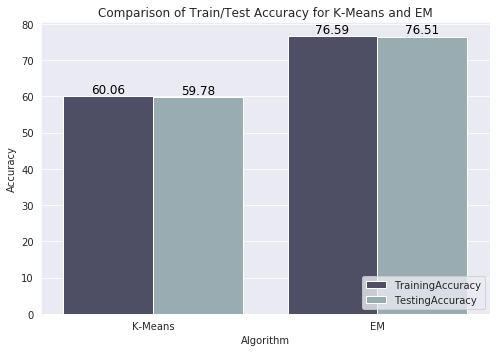

In [43]:
#plot to compare k-means and em
df_km_and_em = pd.concat([df_km,df_em],sort=False)

sns.set_style("darkgrid",
              {
                  'axes.grid' : True
              })
plt.figure(figsize=(7,5))
ax = sns.barplot(x="Algorithm", y="Accuracy", hue="Acc",palette="bone", data=df_km_and_em)
plt.legend(loc='lower right')
ax.set_title('Comparison of Train/Test Accuracy for K-Means and EM')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.savefig("km_and_em.png",dpi=150)

## **Dimensionality Reduction Algorithms**

### **Feature Selection**

In [0]:
#getting the important and not important features from the dataset
important_feature,not_so_important_feature = utils.Feature_Selection(X,y,1000,3)

In [45]:
print('The important features in the Dataset are:')
print(important_feature)

The important features in the Dataset are:
['duration', 'balance', 'age']


In [46]:
print('The not so important features in the Dataset are:')
print(not_so_important_feature)

The not so important features in the Dataset are:
['previous', 'campaign']


In [0]:
#splitting the X into important and un-important features
X_important_feature = X[important_feature]
X_not_so_important_feature = X[not_so_important_feature]

**K-Means**

In [0]:
#Test Train Split
X_train_fea_sel, X_test_fea_sel, y_train_fea_sel, y_test_fea_sel = train_test_split(X_important_feature, y, test_size = 0.30,random_state=100)

In [49]:
#running K-means algorithm after PCA
kmeans_fea_sel = KMeans(n_clusters=2,max_iter=1200, algorithm = 'auto') # You want cluster the energy records into 2: consumed or Not consumed
kmeans_fea_sel.fit(X_train_fea_sel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
#predicting the cluster with the help K-means clustering
print('Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels\n')
y_pred_train_km_fea_sel = kmeans_fea_sel.predict(X_train_fea_sel)
print('Training Accuracy :' , accuracy_score(y_train_fea_sel,y_pred_train_km_fea_sel)*100)

y_pred_test_km_fea_sel = kmeans_fea_sel.predict(X_test_fea_sel)
print('Testing Accuracy :', accuracy_score(y_test_fea_sel,y_pred_test_km_fea_sel)*100)

train_acc_km_fea_sel = []
test_acc_km_fea_sel = []
train_acc_km_fea_sel.append(accuracy_score(y_train_fea_sel,y_pred_train_km_fea_sel))
test_acc_km_fea_sel.append(accuracy_score(y_test_fea_sel,y_pred_test_km_fea_sel))

Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels

Training Accuracy : 39.94059468512023
Testing Accuracy : 40.2241226776762


In [51]:
df1 = pd.DataFrame(
    {'Algorithm': 'Feature Selected K-Means',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_km_fea_sel
    })
df2 = pd.DataFrame(
    {'Algorithm': 'Feature Selected K-Means',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_km_fea_sel
    })

df_km_fea_sel = pd.concat([df1, df2],sort=False)
df_km_fea_sel['Accuracy'] = (df_km_fea_sel['Accuracy'] * 100).round(2)
df_km_fea_sel

,Algorithm,Acc,Accuracy
0,Feature Selected K-Means,TrainingAccuracy,39.94
0,Feature Selected K-Means,TestingAccuracy,40.22


**EM**

In [52]:
# fitting a expectation maximization model
em = GaussianMixture(n_components=2, init_params='random')
Gaussian = em.fit(X_train_fea_sel)
y_pred_train_em_fea_sel= (Gaussian.predict(X_train_fea_sel)>.5).astype('int')
y_pred_test_em_fea_sel= (Gaussian.predict(X_test_fea_sel)>.5).astype('int')

print('Test and Train Accuracies of EM algorithm to a Gaussian Mixture Model after PCA transformation')
print('Training Accuracy :' , accuracy_score(y_train_fea_sel,y_pred_train_em_fea_sel)*100)
print('Testing Accuracy :' , accuracy_score(y_test_fea_sel,y_pred_test_em_fea_sel)*100)

train_acc_em_fea_sel = []
test_acc_em_fea_sel = []
train_acc_em_fea_sel.append(accuracy_score(y_train_fea_sel,y_pred_train_em_fea_sel))
test_acc_em_fea_sel.append(accuracy_score(y_test_fea_sel,y_pred_test_em_fea_sel))

Test and Train Accuracies of EM algorithm to a Gaussian Mixture Model after PCA transformation
Training Accuracy : 75.27095775270958
Testing Accuracy : 75.12533176054261


In [53]:
df1 = pd.DataFrame(
    {'Algorithm': 'Feature Selected EM',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_em_fea_sel
    })
df2 = pd.DataFrame(
    {'Algorithm': 'Feature Selected EM',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_em_fea_sel
    })

df_em_fea_sel = pd.concat([df1, df2],sort=False)
df_em_fea_sel['Accuracy'] = (df_em_fea_sel['Accuracy'] * 100).round(2)
df_em_fea_sel

,Algorithm,Acc,Accuracy
0,Feature Selected EM,TrainingAccuracy,75.27
0,Feature Selected EM,TestingAccuracy,75.13


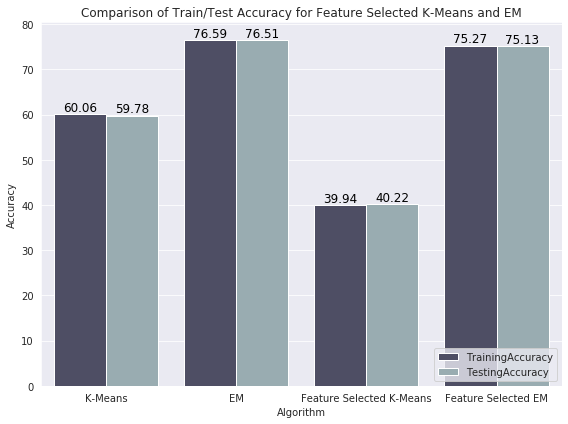

In [54]:
#plot to compare feature selected k-means and em
df_km_and_em_fea_sel = pd.concat([df_km_and_em,df_km_fea_sel,df_em_fea_sel],sort=False)

sns.set_style("darkgrid",
              {
                  'axes.grid' : True
              })
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Algorithm", y="Accuracy", hue="Acc",palette="bone", data=df_km_and_em_fea_sel)
plt.legend(loc='lower right')
ax.set_title('Comparison of Train/Test Accuracy for Feature Selected K-Means and EM')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.savefig("feature_selected_km_and_em.png",dpi=150)

### **PCA**

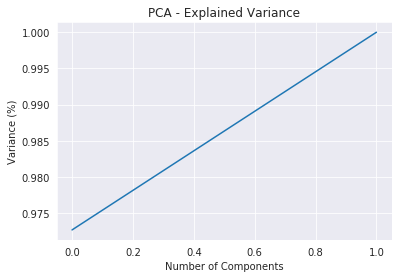

In [55]:
#finding the number of components for the PCA
no_of_components_pca = utils.PCA_no_of_components(X_not_so_important_feature)

In [0]:
#running PCA algorithm for the optimal number of compenents
pca = PCA(n_components=no_of_components_pca,svd_solver='full') 
principalComponents = pca.fit_transform(X_not_so_important_feature)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC'+str(x+1) for x in range(no_of_components_pca)])

In [0]:
#concatenating important features and the PCA's
X_pca = pd.concat([X_important_feature, principalDf], axis=1)

In [59]:
X_pca.head()

,duration,balance,age,PC1
0,0.053070,0.092259,0.519481,-0.028437
1,0.030704,0.073067,0.337662,-0.028437
2,0.015453,0.072822,0.194805,-0.028437
3,0.018707,0.086476,0.376623,-0.028437
4,0.040260,0.072812,0.194805,-0.028437


In [0]:
#Test Train Split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.30,random_state=100)

**K - Means**

Finding the Optimal Number of Clusters after PCA transformation


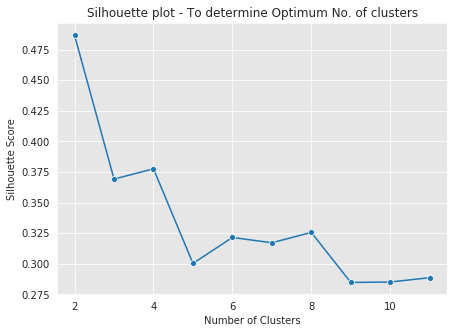

In [63]:
#cluster silhouette plot
print('Finding the Optimal Number of Clusters after PCA transformation')
utils.silhouette_plot(11,X_train_pca)

In [64]:
#running K-means algorithm after PCA
kmeans_pca = KMeans(n_clusters=2,max_iter=1200, algorithm = 'auto') # You want cluster the energy records into 2: consumed or Not consumed
kmeans_pca.fit(X_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
#predicting the cluster with the help K-means clustering
print('Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels\n')
y_pred_train_pca = kmeans_pca.predict(X_train_pca)
print('Training Accuracy :' , accuracy_score(y_train_pca,y_pred_train_pca)*100)

y_pred_test_pca = kmeans_pca.predict(X_test_pca)
print('Testing Accuracy :', accuracy_score(y_test_pca,y_pred_test_pca)*100)


train_acc_km_pca = []
test_acc_km_pca = []
train_acc_km_pca.append(accuracy_score(y_train_pca,y_pred_train_pca))
test_acc_km_pca.append(accuracy_score(y_test_pca,y_pred_test_pca))

Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels

Training Accuracy : 60.05940531487977
Testing Accuracy : 59.7758773223238


In [66]:
df1 = pd.DataFrame(
    {'Algorithm': 'PCA K-Means',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_km_pca
    })
df2 = pd.DataFrame(
    {'Algorithm': 'PCA K-Means',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_km_pca
    })

df_km_pca = pd.concat([df1, df2],sort=False)
df_km_pca['Accuracy'] = (df_km_pca['Accuracy'] * 100).round(2)
df_km_pca

,Algorithm,Acc,Accuracy
0,PCA K-Means,TrainingAccuracy,60.06
0,PCA K-Means,TestingAccuracy,59.78


**EM**

In [67]:
# fitting a expectation maximization model
em = GaussianMixture(n_components=2, init_params='random')
Gaussian = em.fit(X_train_pca)
y_pred_train_em_pca= (Gaussian.predict(X_train_pca)>.5).astype('int')
y_pred_test_em_pca= (Gaussian.predict(X_test_pca)>.5).astype('int')

print('Test and Train Accuracies of EM algorithm to a Gaussian Mixture Model after PCA transformation')
print('Training Accuracy :' , accuracy_score(y_train_pca,y_pred_train_em_pca)*100)
print('Testing Accuracy :' , accuracy_score(y_test_pca,y_pred_test_em_pca)*100)

train_acc_em_pca = []
test_acc_em_pca = []
train_acc_em_pca.append(accuracy_score(y_train_pca,y_pred_train_em_pca))
test_acc_em_pca.append(accuracy_score(y_test_pca,y_pred_test_em_pca))

Test and Train Accuracies of EM algorithm to a Gaussian Mixture Model after PCA transformation
Training Accuracy : 73.7289474515752
Testing Accuracy : 73.64346800353879


In [68]:
df1 = pd.DataFrame(
    {'Algorithm': 'PCA EM',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_em_pca
    })
df2 = pd.DataFrame(
    {'Algorithm': 'PCA EM',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_em_pca
    })

df_em_pca = pd.concat([df1, df2],sort=False)
df_em_pca['Accuracy'] = (df_em_pca['Accuracy'] * 100).round(2)
df_em_pca

,Algorithm,Acc,Accuracy
0,PCA EM,TrainingAccuracy,73.73
0,PCA EM,TestingAccuracy,73.64


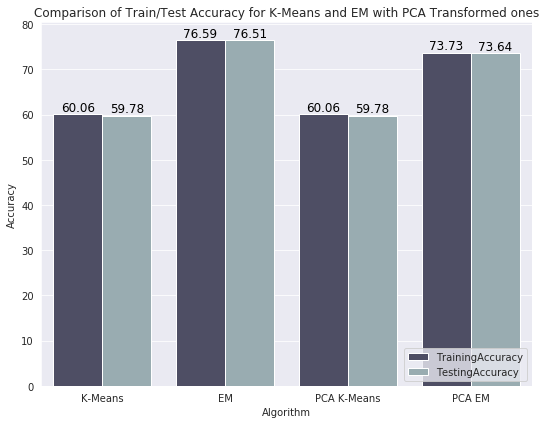

In [69]:
#plot to compare feature selected k-means and em with PCA tranformed K-Means and EM
df_km_and_em_pca = pd.concat([df_km_and_em,df_km_pca,df_em_pca],sort=False)

sns.set_style("darkgrid",
              {
                  'axes.grid' : True
              })
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Algorithm", y="Accuracy", hue="Acc",palette="bone", data=df_km_and_em_pca)
plt.legend(loc='lower right')
ax.set_title('Comparison of Train/Test Accuracy for K-Means and EM with PCA Transformed ones')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.savefig("pca_km_and_em.png",dpi=150)

## **ICA**

In [0]:
#implementing ica
ica = FastICA(n_components=2,max_iter=12000,tol=0.00001,random_state=100)

In [0]:
S_ = ica.fit_transform(X_not_so_important_feature)

In [0]:
IC_Df = pd.DataFrame(data = S_, columns=['IC'+str(x+1) for x in range(2)])

In [0]:
#concatenating important features and the IC's
X_ica = pd.concat([X_important_feature, IC_Df], axis=1)

In [78]:
X_ica.head()

,duration,balance,age,IC1,IC2
0,0.053070,0.092259,0.519481,0.002677,0.001275
1,0.030704,0.073067,0.337662,0.002677,0.001275
2,0.015453,0.072822,0.194805,0.002677,0.001275
3,0.018707,0.086476,0.376623,0.002677,0.001275
4,0.040260,0.072812,0.194805,0.002677,0.001275


In [0]:
#Test Train Split
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X_ica, y, test_size = 0.30,random_state=100)

**K-Means**

Finding the Optimal Number of Clusters after ICA transformation


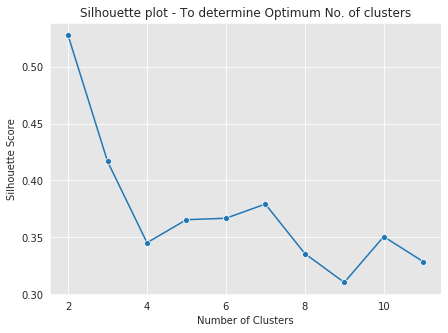

In [80]:
#cluster silhouette plot
print('Finding the Optimal Number of Clusters after ICA transformation')
utils.silhouette_plot(11,X_train_ica)

In [81]:
#running K-means algorithm after PCA
kmeans_ica = KMeans(n_clusters=2,max_iter=1200, algorithm = 'auto') # You want cluster the energy records into 2: consumed or Not consumed
kmeans_ica.fit(X_train_ica)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
#predicting the cluster with the help K-means clustering
print('Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels after ICA transformation\n')
y_pred_train_ica = kmeans_ica.predict(X_train_ica)
print('Training Accuracy :' , accuracy_score(y_train_ica,y_pred_train_ica)*100)

y_pred_test_ica = kmeans_ica.predict(X_test_ica)
print('Testing Accuracy :', accuracy_score(y_test_ica,y_pred_test_ica)*100)

train_acc_km_ica = []
test_acc_km_ica = []
train_acc_km_ica.append(accuracy_score(y_train_ica,y_pred_train_ica))
test_acc_km_ica.append(accuracy_score(y_test_ica,y_pred_test_ica))

Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels after ICA transformation

Training Accuracy : 60.05940531487977
Testing Accuracy : 59.7758773223238


In [83]:
df1 = pd.DataFrame(
    {'Algorithm': 'ICA K-Means',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_km_ica
    })
df2 = pd.DataFrame(
    {'Algorithm': 'ICA K-Means',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_km_ica
    })

df_km_ica = pd.concat([df1, df2],sort=False)
df_km_ica['Accuracy'] = (df_km_ica['Accuracy'] * 100).round(2)
df_km_ica

,Algorithm,Acc,Accuracy
0,ICA K-Means,TrainingAccuracy,60.06
0,ICA K-Means,TestingAccuracy,59.78


**EM**

In [85]:
# fitting a expectation maximization model
em = GaussianMixture(n_components=2, init_params='random')
Gaussian = em.fit(X_train_ica)
y_pred_train_em_ica= (Gaussian.predict(X_train_ica)>.5).astype('int')
y_pred_test_em_ica= (Gaussian.predict(X_test_ica)>.5).astype('int')

print('Test and Train Accuracies of EM algorithm to a Gaussian Mixture Model after PCA transformation')
print('Training Accuracy :' , accuracy_score(y_train_ica,y_pred_train_em_ica)*100)
print('Testing Accuracy :' , accuracy_score(y_test_ica,y_pred_test_em_ica)*100)

train_acc_em_ica = []
test_acc_em_ica = []
train_acc_em_ica.append(accuracy_score(y_train_ica,y_pred_train_em_ica))
test_acc_em_ica.append(accuracy_score(y_test_ica,y_pred_test_em_ica))

Test and Train Accuracies of EM algorithm to a Gaussian Mixture Model after PCA transformation
Training Accuracy : 78.42765506999083
Testing Accuracy : 77.9932173400177


In [86]:
df1 = pd.DataFrame(
    {'Algorithm': 'ICA EM',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_em_ica
    })
df2 = pd.DataFrame(
    {'Algorithm': 'ICA EM',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_em_ica
    })

df_em_ica = pd.concat([df1, df2],sort=False)
df_em_ica['Accuracy'] = (df_em_ica['Accuracy'] * 100).round(2)
df_em_ica

,Algorithm,Acc,Accuracy
0,ICA EM,TrainingAccuracy,78.43
0,ICA EM,TestingAccuracy,77.99


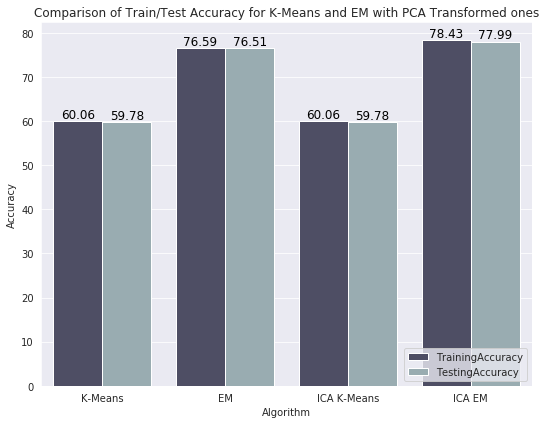

In [87]:
#plot to compare feature selected k-means and em with ICA tranformed K-Means and EM
df_km_and_em_ica = pd.concat([df_km_and_em,df_km_ica,df_em_ica],sort=False)

sns.set_style("darkgrid",
              {
                  'axes.grid' : True
              })
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Algorithm", y="Accuracy", hue="Acc",palette="bone", data=df_km_and_em_ica)
plt.legend(loc='lower right')
ax.set_title('Comparison of Train/Test Accuracy for K-Means and EM with PCA Transformed ones')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.savefig("ica_km_and_em.png",dpi=150)

## **Randomized Projections**

In [0]:
grp = GaussianRandomProjection(n_components=1, random_state=120)
rca_X = grp.fit_transform(X_not_so_important_feature)

In [0]:
RP_Df = pd.DataFrame(data = rca_X, columns=['RP'+str(x+1) for x in range(1)])

In [0]:
#concatenating important features and the PCA's
X_rp = pd.concat([X_important_feature, RP_Df], axis=1)

In [112]:
X_rp.head()

,duration,balance,age,RP1
0,0.053070,0.092259,0.519481,0.0
1,0.030704,0.073067,0.337662,0.0
2,0.015453,0.072822,0.194805,0.0
3,0.018707,0.086476,0.376623,0.0
4,0.040260,0.072812,0.194805,0.0


In [0]:
#Test Train Split
X_train_rp, X_test_rp, y_train_rp, y_test_rp = train_test_split(X_rp, y, test_size = 0.30,random_state=100)

**K-Means**

Finding the Optimal Number of Clusters after RP transformation


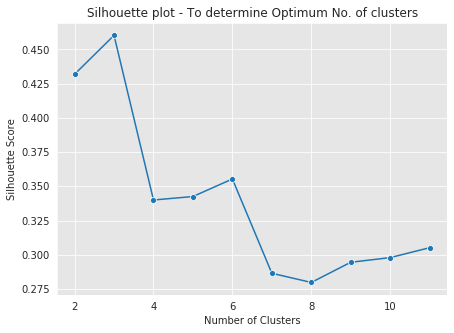

In [114]:
#cluster silhouette plot
print('Finding the Optimal Number of Clusters after RP transformation')
utils.silhouette_plot(11,X_train_rp)

In [115]:
#running K-means algorithm after RP
kmeans_rp = KMeans(n_clusters=3,max_iter=1200, algorithm = 'auto') # You want cluster the energy records into 2: consumed or Not consumed
kmeans_rp.fit(X_train_rp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [116]:
#predicting the cluster with the help K-means clustering
print('Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels after ICA transformation\n')
y_pred_train_rp = kmeans_rp.predict(X_train_rp)
print('Training Accuracy :' , accuracy_score(y_train_rp,y_pred_train_rp)*100)

y_pred_test_rp = kmeans_rp.predict(X_test_rp)
print('Testing Accuracy :', accuracy_score(y_test_rp,y_pred_test_rp)*100)

train_acc_km_rp = []
test_acc_km_rp = []
train_acc_km_rp.append(accuracy_score(y_train_rp,y_pred_train_rp))
test_acc_km_rp.append(accuracy_score(y_test_rp,y_pred_test_rp))

Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels after ICA transformation

Training Accuracy : 57.71795114860808
Testing Accuracy : 57.57151282807431


In [117]:
df1 = pd.DataFrame(
    {'Algorithm': 'RP K-Means',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_km_rp
    })
df2 = pd.DataFrame(
    {'Algorithm': 'RP K-Means',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_km_rp
    })

df_km_rp = pd.concat([df1, df2],sort=False)
df_km_rp['Accuracy'] = (df_km_rp['Accuracy'] * 100).round(2)
df_km_rp

,Algorithm,Acc,Accuracy
0,RP K-Means,TrainingAccuracy,57.72
0,RP K-Means,TestingAccuracy,57.57


**EM**

In [120]:
# fitting a expectation maximization model
em = GaussianMixture(n_components=2, init_params='random')
Gaussian = em.fit(X_train_rp)
y_pred_train_em_rp= (Gaussian.predict(X_train_rp)>.5).astype('int')
y_pred_test_em_rp= (Gaussian.predict(X_test_rp)>.5).astype('int')

print('Test and Train Accuracies of EM algorithm to a Gaussian Mixture Model after PCA transformation')
print('Training Accuracy :' , accuracy_score(y_train_rp,y_pred_train_em_rp)*100)
print('Testing Accuracy :' , accuracy_score(y_test_rp,y_pred_test_em_rp)*100)

train_acc_em_rp = []
test_acc_em_rp = []
train_acc_em_rp.append(accuracy_score(y_train_rp,y_pred_train_em_rp))
test_acc_em_rp.append(accuracy_score(y_test_rp,y_pred_test_em_rp))

Test and Train Accuracies of EM algorithm to a Gaussian Mixture Model after PCA transformation
Training Accuracy : 74.30404145732614
Testing Accuracy : 74.27749926275436


In [121]:
df1 = pd.DataFrame(
    {'Algorithm': 'RP EM',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_em_rp
    })
df2 = pd.DataFrame(
    {'Algorithm': 'RP EM',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_em_rp
    })

df_em_rp = pd.concat([df1, df2],sort=False)
df_em_rp['Accuracy'] = (df_em_rp['Accuracy'] * 100).round(2)
df_em_rp

,Algorithm,Acc,Accuracy
0,RP EM,TrainingAccuracy,74.30
0,RP EM,TestingAccuracy,74.28


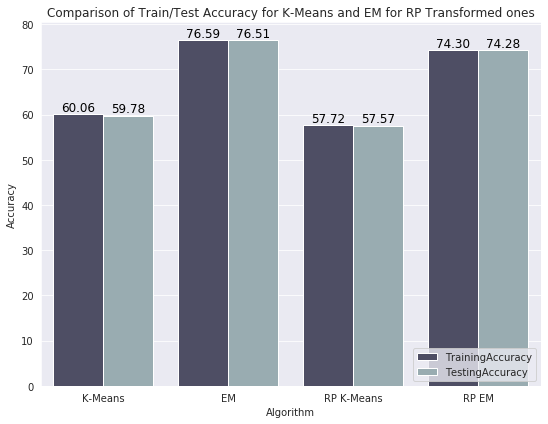

In [122]:
#plot to compare feature selected k-means and em with ICA tranformed K-Means and EM
df_km_and_em_rp = pd.concat([df_km_and_em,df_km_rp,df_em_rp],sort=False)

sns.set_style("darkgrid",
              {
                  'axes.grid' : True
              })
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Algorithm", y="Accuracy", hue="Acc",palette="bone", data=df_km_and_em_rp)
plt.legend(loc='lower right')
ax.set_title('Comparison of Train/Test Accuracy for K-Means and EM for RP Transformed ones')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.savefig("rp_km_and_em.png",dpi=150)

## **Neural Networks - Dimensionality Reduction**

**Neural Network Model without Dimensionality Reduction**

In [0]:
@tf.function
def create_placeholders(n_x, n_y):
  X = tf.placeholder(tf.float32,[n_x,None]) # Since we have 27 features as input
  y = tf.placeholder(tf.float32,[n_y,None])  # Since we have 1 outut labels
  return X,y

def initialize_parameters(layer_dims):
  tf.set_random_seed(1)  
  parameters = {}
  L = len(layer_dims)       

  for l in range(1, L):
    #Intializing Parameters
    parameters['W' + str(l)] = tf.get_variable('W' + str(l) ,shape = [layer_dims[l],layer_dims[l-1]],initializer = tf.initializers.glorot_normal())
    parameters['b' + str(l)] = tf.get_variable('b' + str(l) ,shape = [layer_dims[l],1],initializer = tf.zeros_initializer)
 
  return parameters

@tf.function
def relu(Z):  
    A = tf.nn.relu(Z)
    cache = Z 
    return A, cache

@tf.function
def sigmoid(Z):
    A = tf.nn.sigmoid(Z)
    cache = Z
    
    return A, cache

def linear_forward(A, W, b):
    
    Z = tf.matmul(W,A) + b
    cache = (A, W, b)
    
    return Z, cache

@tf.function
def linear_activation_forward(A_prev, W, b, activation):

  if activation == "sigmoid":
      # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = sigmoid(Z)

  elif activation == "relu":
      # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = relu(Z)

  cache = (linear_cache, activation_cache)

  return A, cache

@tf.function
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation="relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="sigmoid")
    caches.append(cache)
    
    #assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches


@tf.function
def compute_cost(AL, Y):
    logits = tf.transpose(AL)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.math.squared_difference(logits,labels))
    return cost

In [0]:
### CONSTANTS ###
layers_dims = [5, 20, 10, 5, 1] #  4-layer model

In [0]:
# tf.reset_default_graph()

# with tf.Session() as sess:
#     X, Y = create_placeholders(27,1)
#     parameters = initialize_parameters(layers_dims)
#     AL, caches = L_model_forward(X, parameters)
#     cost = compute_cost(AL, Y)
#     print("cost = " + str(cost))
#     print(parameters)

In [0]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
   
    m = X.shape[1]                 # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [0]:
def model(X_train, Y_train, X_test, Y_test, layers_dims, learning_rate = 0.01,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):

    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 30                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters(layers_dims)
    
    # Forward propagation
    AL, caches = L_model_forward(X, parameters)
    
    # Cost function
    cost = compute_cost(AL, Y)
    
    # Backpropagation
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        for epoch in range(num_epochs):
            epoch_cost = 0.                       
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
          
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        # plt.plot(np.squeeze(costs))
        # plt.ylabel('cost')
        # plt.xlabel('iterations (per tens)')
        # plt.title("Learning rate =" + str(learning_rate))
        # plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        predicted = AL

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.round(predicted), Y)

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        Training_Accuracy = accuracy.eval({X: X_train, Y: Y_train})
        Testing_Accuracy  = accuracy.eval({X: X_test, Y: Y_test})
        print ("Train Accuracy:", Training_Accuracy)
        print ("Test Accuracy:", Testing_Accuracy)
        
        return parameters, costs, Training_Accuracy, Testing_Accuracy

In [0]:
X_train_flatten  = X_train.values.reshape(X_train.shape[0],-1).T
y_train_flatten = y_train.values.reshape(y_train.shape[0],-1).T
X_test_flatten  = X_test.values.reshape(X_test.shape[0],-1).T
y_test_flatten = y_test.values.reshape(y_test.shape[0],-1).T

In [131]:
### CONSTANTS ###
layers_dims = [5, 20, 10, 5, 1] #  3-layer hidden model
batches = [1000]
cost_dict=dict()
train_acc_nn = []
test_acc_nn = []
for batch in batches:
  _,costs,Training_Accuracy,Testing_Accuracy = parameters = model(X_train_flatten, y_train_flatten, X_test_flatten, y_test_flatten,learning_rate = 0.01,num_epochs = 500,
                                                                  minibatch_size = batch,print_cost = False,layers_dims=layers_dims)
  cost_dict[batch] = costs
  train_acc_nn.append(Training_Accuracy)
  test_acc_nn.append(Testing_Accuracy)

Parameters have been trained!
Train Accuracy: 0.8944608
Test Accuracy: 0.8883073


In [132]:
df1 = pd.DataFrame(
    {'Algorithm': 'Neural Network',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_nn
    })
df2 = pd.DataFrame(
    {'Algorithm': 'Neural Network',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_nn
    })

df_nn = pd.concat([df1, df2],sort=False)
df_nn['Accuracy'] = (df_nn['Accuracy'] * 100).round(2)
df_nn

,Algorithm,Acc,Accuracy
0,Neural Network,TrainingAccuracy,89.45
0,Neural Network,TestingAccuracy,88.83


**After Dimensionality Reduction**

In [0]:
#Test Train Split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_pca, y, test_size = 0.30,random_state=100)

In [134]:
X_train_nn.shape

(31647, 4)

In [0]:
X_train_flatten_nn  = X_train_nn.values.reshape(X_train_nn.shape[0],-1).T
y_train_flatten_nn = y_train_nn.values.reshape(y_train_nn.shape[0],-1).T
X_test_flatten_nn  = X_test_nn.values.reshape(X_test_nn.shape[0],-1).T
y_test_flatten_nn = y_test_nn.values.reshape(y_test_nn.shape[0],-1).T

In [137]:
### CONSTANTS ###
layers_dims = [4, 20, 10, 5, 1] #  3-layer hidden model
batches = [1000]
cost_dict=dict()
train_acc_nn_km = []
test_acc_nn_km = []
for batch in batches:
  _,costs,Training_Accuracy,Testing_Accuracy = parameters = model(X_train_flatten_nn, y_train_flatten_nn, X_test_flatten_nn, y_test_flatten_nn,learning_rate = 0.01,num_epochs = 500,
                                                                  minibatch_size = batch,print_cost = False,layers_dims=layers_dims)
  cost_dict[batch] = costs
  train_acc_nn_km.append(Training_Accuracy)
  test_acc_nn_km.append(Testing_Accuracy)

Parameters have been trained!
Train Accuracy: 0.89253324
Test Accuracy: 0.88992923


In [138]:
df1 = pd.DataFrame(
    {'Algorithm': 'NN PCA',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_nn_km
    })
df2 = pd.DataFrame(
    {'Algorithm': 'NN PCA',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_nn_km
    })

df_nn_km = pd.concat([df1, df2],sort=False)
df_nn_km['Accuracy'] = (df_nn_km['Accuracy'] * 100).round(2)
df_nn_km

,Algorithm,Acc,Accuracy
0,NN PCA,TrainingAccuracy,89.25
0,NN PCA,TestingAccuracy,88.99


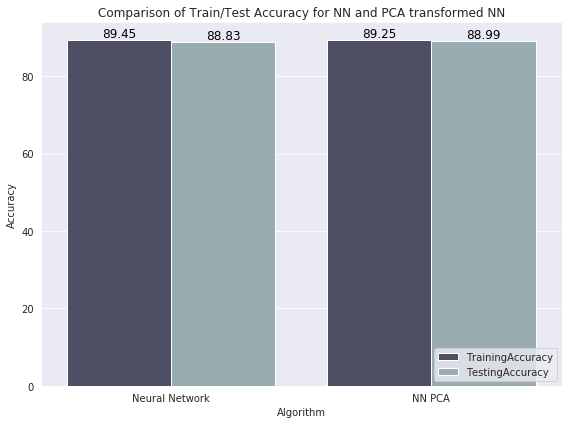

In [139]:
#plot to compare feature selected k-means and em with ICA tranformed K-Means and EM
df_nn_and_km = pd.concat([df_nn,df_nn_km],sort=False)

sns.set_style("darkgrid",
              {
                  'axes.grid' : True
              })
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Algorithm", y="Accuracy", hue="Acc",palette="bone", data=df_nn_and_km)
plt.legend(loc='lower right')
ax.set_title('Comparison of Train/Test Accuracy for NN and PCA transformed NN')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.savefig("nn_and_km.png",dpi=150)

**After Dimensionality reduction with clusters generated by K-Means**

In [0]:
#Test Train Split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.30,random_state=100)

In [141]:
#running K-means algorithm after RP
kmeans_nn = KMeans(n_clusters=2,max_iter=1200, algorithm = 'auto') # You want cluster the energy records into 2: consumed or Not consumed
kmeans_nn.fit(X_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [142]:
#predicting the cluster with the help K-means clustering
print('Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels\n')
y_pred_train_nn = kmeans_nn.predict(X_train_pca)
y_pred_test_nn = kmeans_nn.predict(X_test_pca)


Measuring the Accuracy of LineUp of the cluster with respect to the Class Labels



In [0]:
X_train_flatten_nn_km  = X_train_pca.values.reshape(X_train_pca.shape[0],-1).T
y_train_flatten_nn_km = y_pred_train_nn.reshape(y_pred_train_nn.shape[0],-1).T
X_test_flatten_nn_km  = X_test_pca.values.reshape(X_test_pca.shape[0],-1).T
y_test_flatten_nn_km = y_pred_test_nn.reshape(y_pred_test_nn.shape[0],-1).T

In [144]:
### CONSTANTS ###
layers_dims = [4, 20, 10, 5, 1] #  3-layer hidden model
batches = [1000]
cost_dict=dict()
train_acc_km_label = []
test_acc_km_label = []
for batch in batches:
  _,costs,Training_Accuracy,Testing_Accuracy = parameters = model(X_train_flatten_nn_km, y_train_flatten_nn_km, X_test_flatten_nn_km, y_test_flatten_nn_km,learning_rate = 0.01,num_epochs = 500,
                                                                  minibatch_size = batch,print_cost = False,layers_dims=layers_dims)
  cost_dict[batch] = costs
  train_acc_km_label.append(Training_Accuracy)
  test_acc_km_label.append(Testing_Accuracy)

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.99992627


In [145]:
df1 = pd.DataFrame(
    {'Algorithm': 'NN K-Means Label',
     'Acc': 'TrainingAccuracy',
     'Accuracy': train_acc_km_label
    })
df2 = pd.DataFrame(
    {'Algorithm': 'NN K-Means Label',
     'Acc': 'TestingAccuracy',
     'Accuracy': test_acc_km_label
    })

df_nn_label = pd.concat([df1, df2],sort=False)
df_nn_label['Accuracy'] = (df_nn_label['Accuracy'] * 100).round(2)
df_nn_label

,Algorithm,Acc,Accuracy
0,NN K-Means Label,TrainingAccuracy,100.00
0,NN K-Means Label,TestingAccuracy,99.99


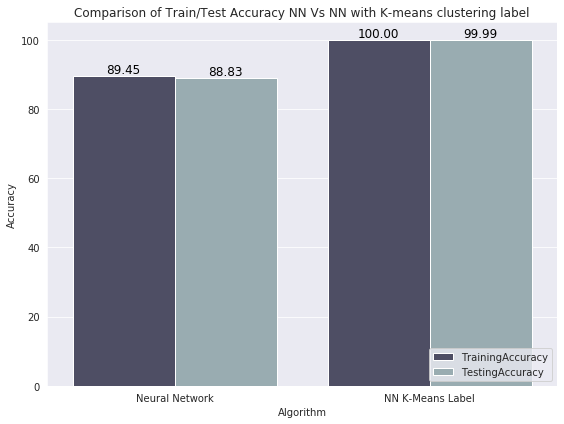

In [146]:
#plot to compare feature selected k-means and em with ICA tranformed K-Means and EM
df_nn_and_km_label = pd.concat([df_nn,df_nn_label],sort=False)

sns.set_style("darkgrid",
              {
                  'axes.grid' : True
              })
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Algorithm", y="Accuracy", hue="Acc",palette="bone", data=df_nn_and_km_label)
plt.legend(loc='lower right')
ax.set_title('Comparison of Train/Test Accuracy NN Vs NN with K-means clustering label')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.savefig("nn_and_km_label.png",dpi=150)

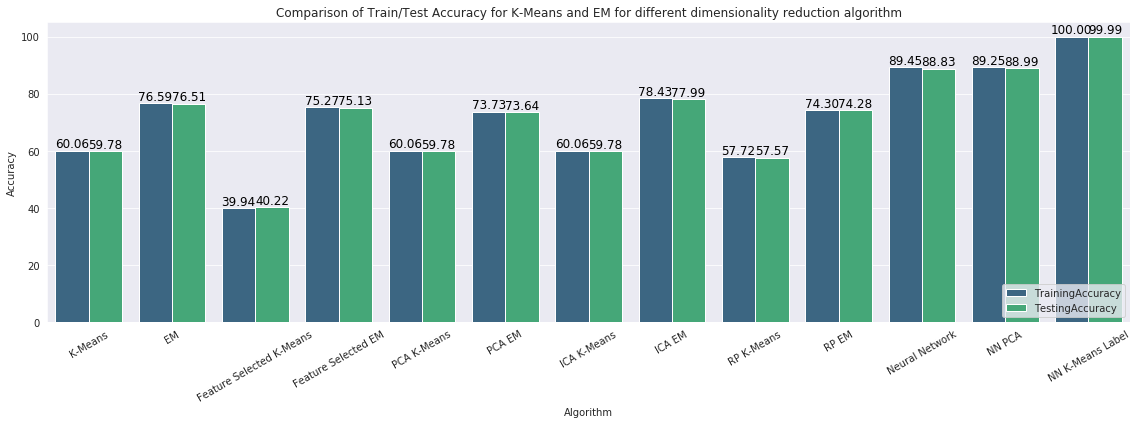

In [147]:
#plot to compare feature selected k-means and em with ICA tranformed K-Means and EM
df_nn_and_km_label = pd.concat([df_km,df_em,df_km_fea_sel,df_em_fea_sel,df_km_pca,df_em_pca,df_km_ica,df_em_ica,df_km_rp,df_em_rp,df_nn,df_nn_km,df_nn_label],sort=False)

sns.set_style("darkgrid",
              {
                  'axes.grid' : True
              })
plt.figure(figsize=(16,6))
ax = sns.barplot(x="Algorithm", y="Accuracy", hue="Acc",palette="viridis", data=df_nn_and_km_label)
plt.legend(loc='lower right')
ax.set_title('Comparison of Train/Test Accuracy for K-Means and EM for different dimensionality reduction algorithm')
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=30)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.savefig("final.png",dpi=150)

In [0]:
# http://www.blackarbs.com/blog/intro-to-expectation-maximization-k-means-gaussian-mixture-models-with-python-sklearn/3/20/2017
# https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
# https://stackoverflow.com/questions/35407669/independent-component-analysis-ica-in-python# https://www.kaggle.com/prakharrathi25/weather-data-clustering-using-k-means #parallel plot
# https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
# https://stats.stackexchange.com/questions/31083/how-to-produce-a-pretty-plot-of-the-results-of-k-means-cluster-analysis
# https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/